<a href="https://colab.research.google.com/github/leejunho12316/HonGongMachine/blob/main/Chapter05_%EC%8B%9C%ED%97%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
df_original = pd.read_csv('Clean_Dataset.csv')
df_original.drop(df_original.columns[0], axis=1, inplace = True)
df = df_original.copy()

df_original.head(3)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956


#원하는 자료형만 남기는 방법

In [5]:
df.select_dtypes('number')

,duration,days_left,price
0,2.17,1.0,5953.0
1,2.33,1.0,5953.0
2,2.17,1.0,5956.0
3,2.25,1.0,5955.0
4,2.33,1.0,5955.0
...,...,...,...
13443,4.92,19.0,4496.0
13444,4.92,19.0,4496.0
13445,5.42,19.0,4496.0
13446,6.08,19.0,4496.0


In [7]:
df.select_dtypes('object')

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy
...,...,...,...,...,...,...,...,...
13443,Vistara,UK-993,Delhi,Afternoon,one,Evening,Bangalore,Economy
13444,Vistara,UK-951,Delhi,Afternoon,one,Evening,Bangalore,Economy
13445,Vistara,UK-933,Delhi,Afternoon,one,Night,Bangalore,Economy
13446,Vistara,UK-945,Delhi,Morning,one,Evening,Bangalore,Economy


#일변량 비시각화 탐색 2가지

In [15]:
df = df_original.copy()
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [16]:
df['class'].value_counts()

,count
class,
Economy,206666
Business,93487


#다변량 비시각화 탐색 2가지

In [28]:
df.select_dtypes('number').corr()

,duration,days_left,price
duration,1.000000,-0.039157,0.204222
days_left,-0.039157,1.000000,-0.091949
price,0.204222,-0.091949,1.000000


In [29]:
df = df_original.copy()
df[df['class'] == 'Economy'].select_dtypes('number').corr()

,duration,days_left,price
duration,1.000000,-0.042537,0.288379
days_left,-0.042537,1.000000,-0.559551
price,0.288379,-0.559551,1.000000


In [30]:
df = df_original.copy()
df.head(3)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956


In [36]:
pd.crosstab(index = df['airline'], columns=df['departure_time'])

departure_time,Afternoon,Early_Morning,Evening,Late_Night,Morning,Night
airline,,,,,,
AirAsia,3078,3692,3657,143,2348,3180
Air_India,10876,19867,18626,291,17768,13464
GO_FIRST,4942,6103,4904,146,4116,2962
Indigo,10155,8184,8460,726,11491,4104
SpiceJet,1193,2728,2031,0,1519,1540
Vistara,17550,26216,27424,0,33904,22765


#일변량 시각화

In [ ]:
plot pie bar boxplot hist

In [37]:
df = df_original.copy()
df.head(3)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956


#1. plot

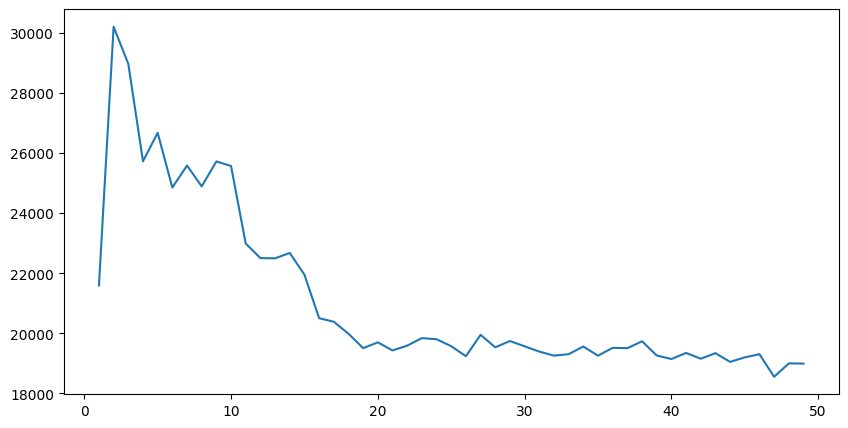

In [44]:
temp1 = df[['days_left','price']].groupby('days_left').mean()

plt.figure(figsize=(10,5))
plt.plot(temp1)
plt.show()

#2. barplot

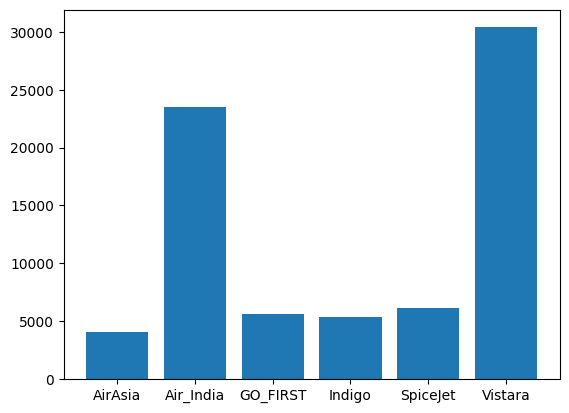

In [42]:
temp2 =  df[['airline','price']].groupby('airline').mean()

plt.figure()
plt.bar(temp2.index, temp2['price'])
plt.show()

#3. pie

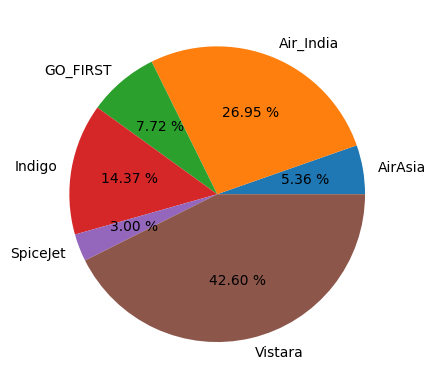

In [50]:
temp3 = df.groupby('airline').count()['flight']
plt.figure()
plt.pie(temp3,labels=temp3.index, autopct = '%.2f %%')
plt.show()

#4. boxplot

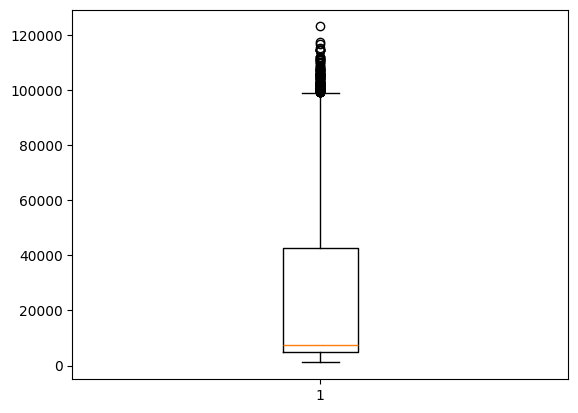

In [54]:
df.head()

plt.figure()
plt.boxplot(df['price'])
plt.show()

<Axes: >

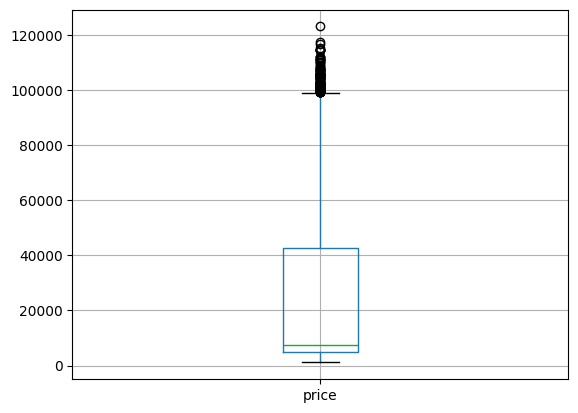

In [56]:
df[['price']].boxplot()

#5. histogram

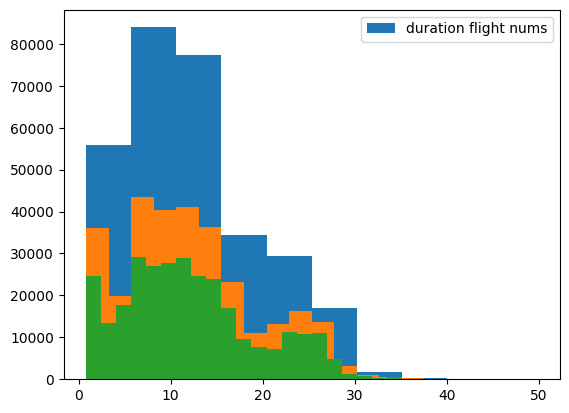

In [71]:
df.head(3)

plt.figure()
plt.hist(df['duration'], bins=10)
plt.hist(df['duration'], bins=20)
plt.hist(df['duration'], bins=30)
plt.legend(['duration flight nums'])
plt.show()

#다변량 시각화

#1. scatter

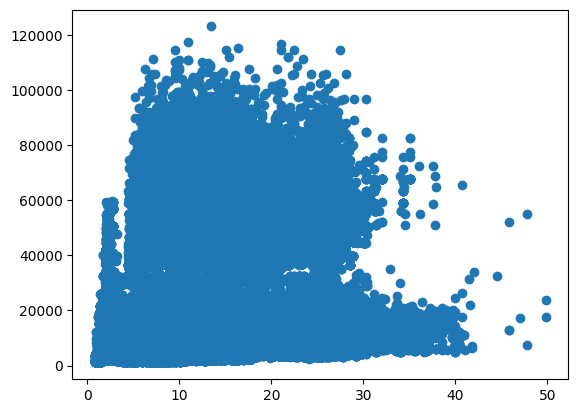

In [76]:
plt.figure()
plt.scatter(x=df['duration'], y=df['price'])
plt.show()

In [75]:
df.head(3)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956


#2. heatmap

In [81]:
temp8 = df.select_dtypes('number')
temp8 = temp8.corr()
temp8

,duration,days_left,price
duration,1.000000,-0.039157,0.204222
days_left,-0.039157,1.000000,-0.091949
price,0.204222,-0.091949,1.000000


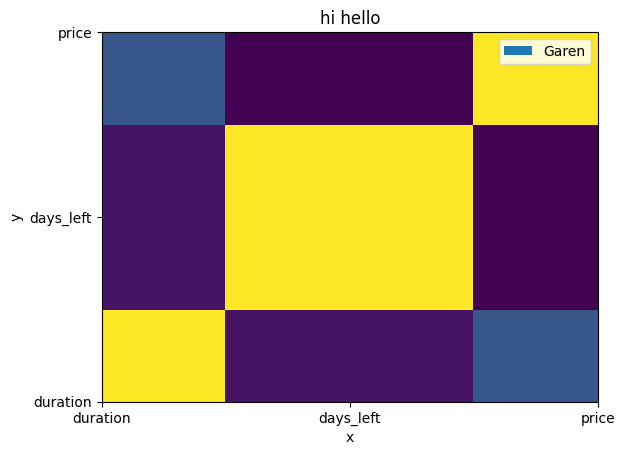

In [95]:
plt.figure()
plt.pcolor(temp8)

plt.xlabel('x')
plt.ylabel('y')
plt.grid(False)
plt.title('hi hello')
plt.legend(['Garen','Lux','Nyang'])

plt.xticks([0.5, 1.5, 2.5], labels=temp8.index)
plt.yticks([0.5, 1.5, 2.5], labels=temp8.index)

plt.xlim(0.5, 2.5)
plt.ylim(0.5, 2.5)

plt.show()

#SEABORN

#1. catplot

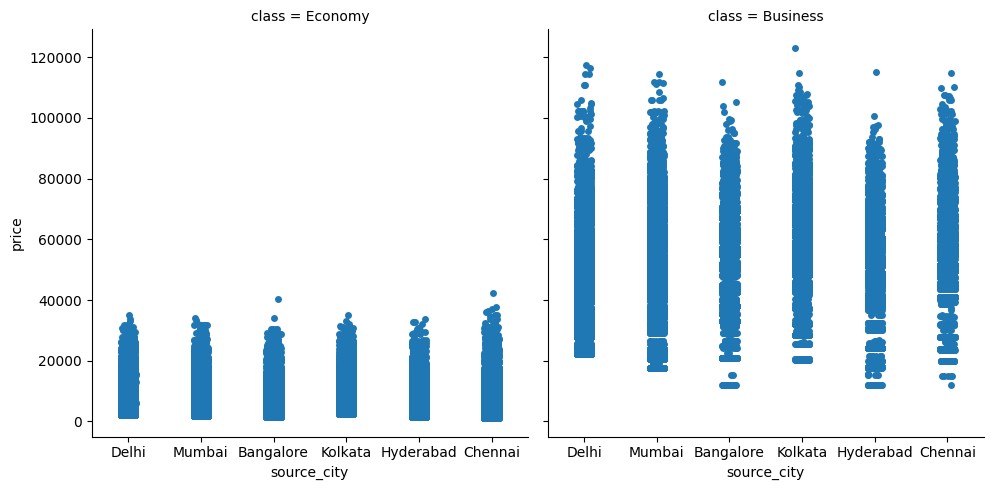

In [116]:
import seaborn as sns

sns.catplot(x='source_city', y='price', col='class', data=df)

In [113]:
df.head(3)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956


#2. lmplot


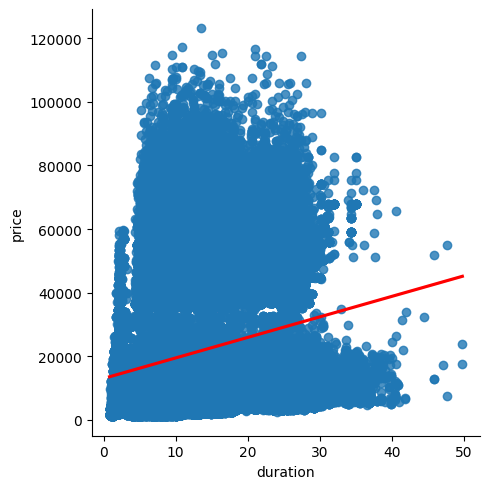

In [120]:
sns.lmplot(x='duration', y='price', data=df, line_kws={'color':'red'})

#3. countplot

<Axes: xlabel='airline', ylabel='count'>

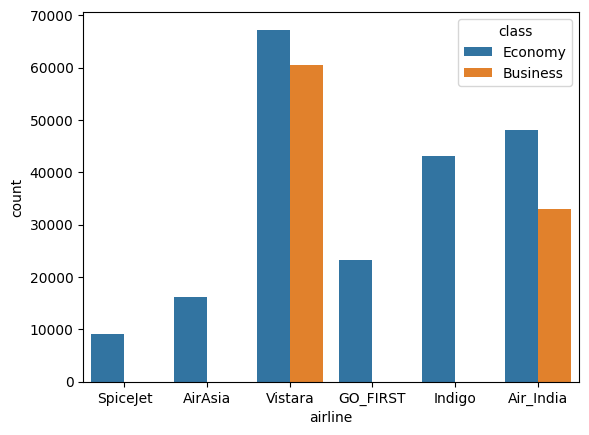

In [122]:
sns.countplot(x='airline', hue = 'class', data=df)

#4. jointplot

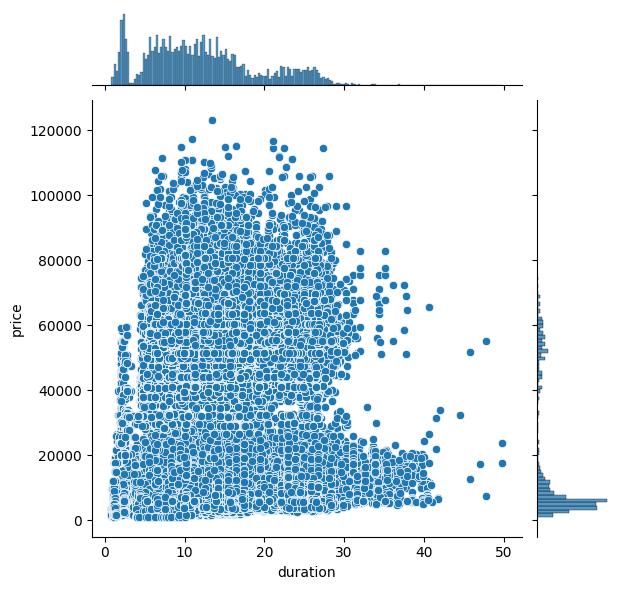

In [124]:
sns.jointplot(x='duration', y='price', data=df)

<Axes: >

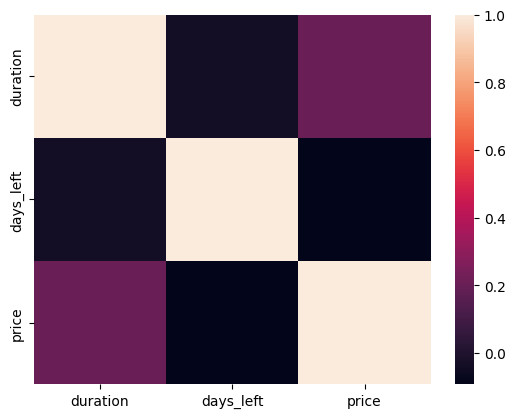

In [127]:
sns.heatmap(df.select_dtypes('number').corr())